# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [6]:
### Your code here . . .
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in header
blast_h = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', comment='#', nrows=0)

# extract column names
header = blast_h.columns[0].replace('# Fields:', '').split(', ')
print(header)

# read data with extracted header
df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', comment='#', names=header, skiprows=7, usecols=header)
df.head()
df.drop(columns=' query acc.ver', inplace=True)
df.set_index('subject acc.ver', inplace=True)
df.head()

[' query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications']


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3


### Question 2
What is the average number of publications?

In [12]:
### Your code here . . .
avg = pd.to_numeric(df['publications'], errors='coerce').mean() #coerce errors to deal with non-numeric values
print(avg)

26.989690721649485


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [15]:
### Your code here . . .
ans = df[df['bonds'] > 15000].index # can use 'index' because we set the index to 'subject acc.ver' earlier
print(ans)


Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

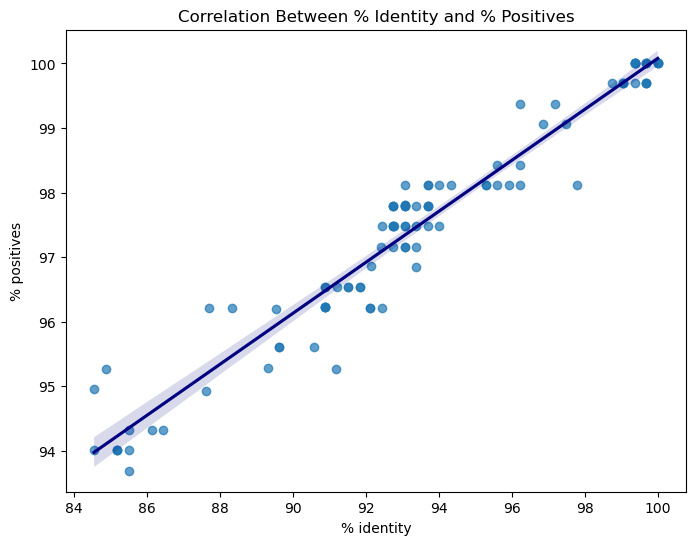

In [25]:
### Your code here . . .

# set plot size
plt.figure(figsize=(8, 6))

# create scatter plot with regression line
sns.regplot(
    data=df,
    x='% identity',
    y='% positives',
    scatter_kws={'alpha': 0.7}, 
    line_kws={'color': 'navy'}
)

# add title 
plt.title('Correlation Between % Identity and % Positives')
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [31]:
### Your code here . . .
protein_df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')

df = df.reset_index(drop=True)
merged_df = pd.merge(df, protein_df, left_on='subject acc.ver', right_on='Protein', how='left' )

# Add 'Protein source' column and drop 'Protein'
merged_df.rename(columns={'Source': 'Protein source'}, inplace=True)
merged_df.drop(columns='Protein', inplace=True)

# Replace missing entries with 'NA' 
merged_df['Protein source'].fillna('NA', inplace=True)

merged_df.head()


,level_0,index,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Unnamed: 0,Protein source
0,0,0,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9,0.0,RefSeq
1,1,1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47,NaN,NA
2,2,2,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13,2.0,GenPept
3,3,3,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41,NaN,NA
4,4,4,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3,NaN,NA
